# The Heat Equation

The one dimensional heat equation is the following,

\begin{equation}
\partial_tu(x,t) = \alpha \partial^2_x u(x,t),
\end{equation}

where $\alpha$ is a constant.

In [2]:
%matplotlib notebook
# import necessary packages
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Approximator
from etraj.etraj import Vector, Matrix, UGrid, Approximator, ScalarField, heatEquation
import etraj.etraj as et

In [5]:
# create the microstates
N = 1000
left = 0.0
right = 10.0
x = np.random.uniform(left,right,N)

# create the grid
g = UGrid(x)

In [12]:
# create a scalar field which is a Gaussian centered at mu = 5.0
mu = 5.0
f = (1/np.sqrt(2*np.pi))*np.exp(-.5*(x - mu)**2)
s = ScalarField(g,f,g.get_logger())

<IPython.core.display.Javascript object>


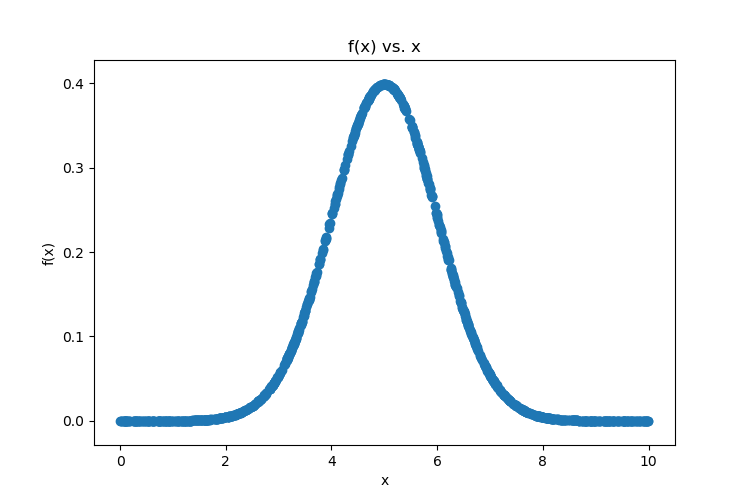

In [13]:
# plot the values of the function
fig, axs = plt.subplots(figsize=(7.5,5))
axs.scatter(x,f)
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.show()

In [14]:
# let's create a diffEQ object for the heat equation
h_eq = heatEquation()
h_eq.set_scalarfield(s)

AttributeError: 'etraj.etraj.heatEquation' object has no attribute 'set_scalarfield'

In [ ]:
# let's generate a simple Runge-Kutta algorithm using the diffEQ's methods
